In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# current version of seaborn generates a bunch of warnings that we'll ignore
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
color = sns.color_palette()

In [3]:
df = pd.read_csv('Ecommerce - UK Retailer.csv',encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 


In [4]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

<AxesSubplot:xlabel='CustomerID'>

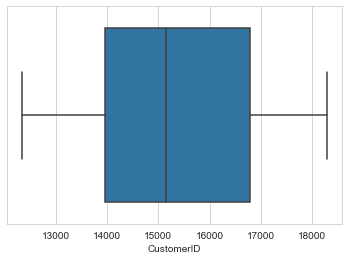

In [5]:
sns.boxplot(df["CustomerID"])

<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

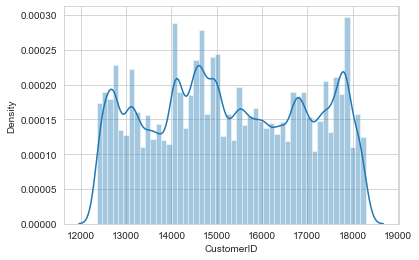

In [6]:
sns.distplot(df["CustomerID"])

Data distribution is symmetric, So we have to replace missing values with meanopriate metric is mean

In [7]:
x=df["CustomerID"].mean()
type(x)

float

In [8]:
df['CustomerID']=df["CustomerID"].fillna(x)

In [9]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# 3. Remove duplicate rows 

In [12]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [13]:
df=df.drop_duplicates(keep=False)

In [14]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# 4. Remove rows which have negative values in Quantity column 

In [15]:
df_new = df[(df['Quantity'] >= 0)]

In [16]:
df_new.shape

(520615, 8)

# 5. Add the columns - Month, Day and Hour for the invoice 

In [17]:
df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1       # +1 to make Monday=1.....until Sunday=7
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8


# 6. How many orders made by the customers?

In [18]:
total_order = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
total_order.head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


In [19]:
index = pd.Index(df_new['Quantity'])
print(f"Total orders made by the customers is {index.value_counts().sum()}")

Total orders made by the customers is 520615


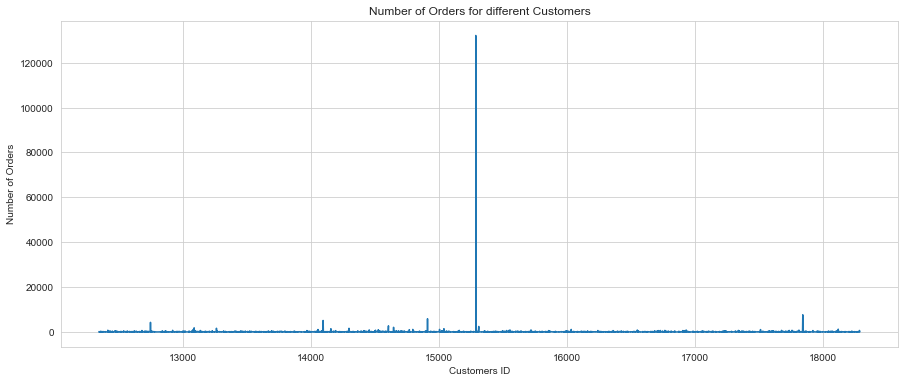

In [20]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

# 7. TOP 5 customers with higher number of orders

In [21]:
orders['CustomerID'] = orders['CustomerID'].astype('int64')

In [22]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
2191,15287,United Kingdom,132091
4059,17841,United Kingdom,7659
1903,14911,EIRE,5893
1308,14096,United Kingdom,5128
338,12748,United Kingdom,4289


# 8. How much money spent by the customers?

In [23]:
# Making a column for Sales

df_new['Sales'] = df_new['Quantity'] * df_new['UnitPrice']

In [24]:
spent_money = df_new.groupby(by=['CustomerID','Country'], as_index=False)['Sales'].sum()
print(spent_money)

      CustomerID         Country     Sales
0        12346.0  United Kingdom  77183.60
1        12347.0         Iceland   4310.00
2        12348.0         Finland   1797.24
3        12349.0           Italy   1757.55
4        12350.0          Norway    334.40
...          ...             ...       ...
4351     18280.0  United Kingdom    180.60
4352     18281.0  United Kingdom     80.82
4353     18282.0  United Kingdom    178.05
4354     18283.0  United Kingdom   1998.68
4355     18287.0  United Kingdom   1837.28

[4356 rows x 3 columns]


In [25]:
index = pd.Index(df_new['Sales'])
print(f"Total Money Spent by customers is {index.value_counts().sum()}")

Total Money Spent by customers is 520615


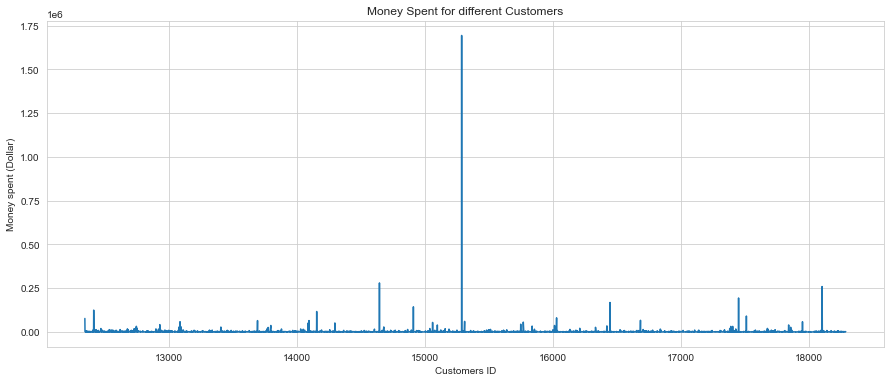

In [26]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['Sales'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Sales)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 9. TOP 5 customers with highest money spent

In [27]:
money_spent.sort_values(by='Sales', ascending=False).head()

,CustomerID,Country,Sales
2176,15287.69057,United Kingdom,1694485.90
1698,14646.00000,Netherlands,280206.02
4219,18102.00000,United Kingdom,259657.30
3746,17450.00000,United Kingdom,194230.79
3026,16446.00000,United Kingdom,168472.50


# 10. How many orders per month?

In [28]:
opm = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()

print(opm)

[201012]    1566
[201101]    1089
[201102]    1101
[201103]    1459
[201104]    1255
[201105]    1689
[201106]    1537
[201107]    1484
[201108]    1367
[201109]    1858
[201110]    2070
[201111]    2830
[201112]     829
Name: year_month, dtype: int64


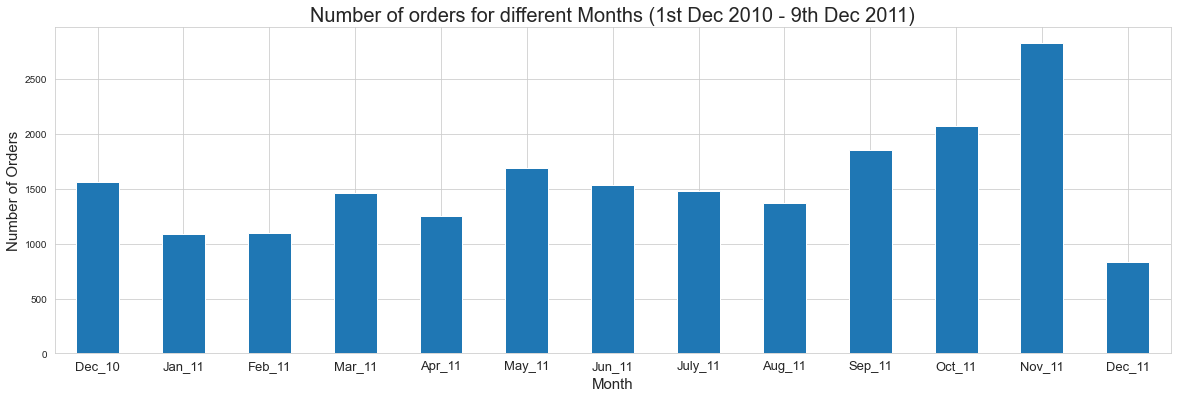

In [29]:
opm = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(20,6))
opm.set_xlabel('Month',fontsize=15)
opm.set_ylabel('Number of Orders',fontsize=15)
opm.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
opm.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11',
                     'Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

# 11. How many orders per day? 

In [30]:
opd = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()
print(opd)

[1]    3152
[2]    3594
[3]    3728
[4]    4276
[5]    3177
[7]    2207
Name: Day, dtype: int64


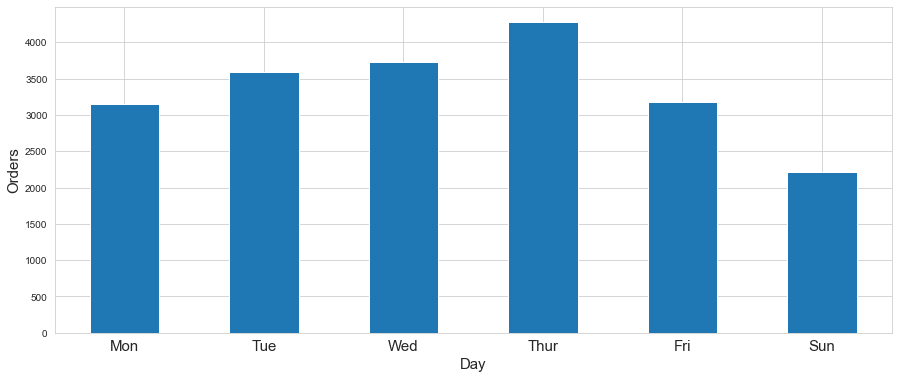

In [31]:
opd = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
opd.set_xlabel('Day',fontsize=15)
opd.set_ylabel('Orders',fontsize=15)
opd.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour?

In [32]:
oph = df_new['Hour'].value_counts().sort_index()

In [33]:
#value_counts().sort_index()

oph =  df_new.groupby('InvoiceNo')['Hour'].unique().value_counts()

print(oph)

[12]        3241
[13]        2774
[14]        2473
[11]        2424
[10]        2377
[15]        2362
[9]         1501
[16]        1347
[17]         675
[8]          567
[18]         198
[19]         146
[7]           29
[20]          18
[11, 12]       1
[6]            1
Name: Hour, dtype: int64


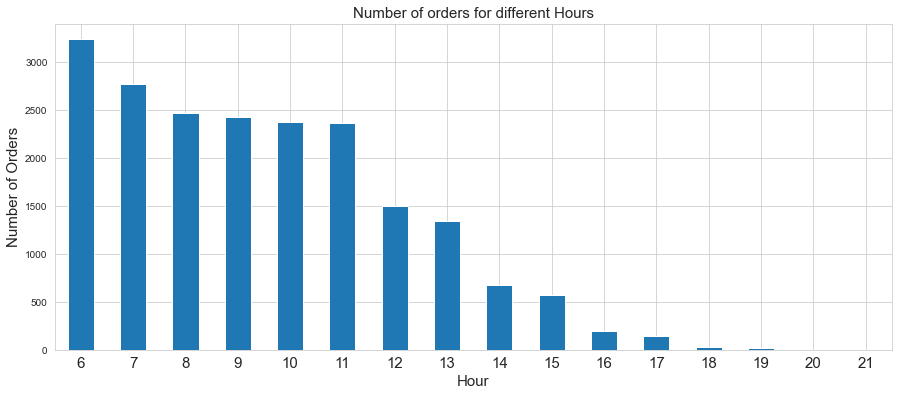

In [34]:
oph= df_new.groupby('InvoiceNo')["Hour"].unique().value_counts().plot(kind='bar',figsize=(15,6))
oph.set_xlabel('Hour',fontsize=15)
oph.set_ylabel('Number of Orders',fontsize=15)
oph.set_title('Number of orders for different Hours',fontsize=15)
oph.set_xticklabels(range(6,22), rotation='horizontal', fontsize=15)
plt.show()

# 13. How many orders for each country?

In [35]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
group_country_orders

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  276
Israel                     289
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                438
Sweden                     449
Cyprus                     593
Finland                    685
Channel Islands            746
Italy                      758
Norway                    1072
Australia                 1183
Portugal                  1484
Switzerland               1951
Belgium                   2031


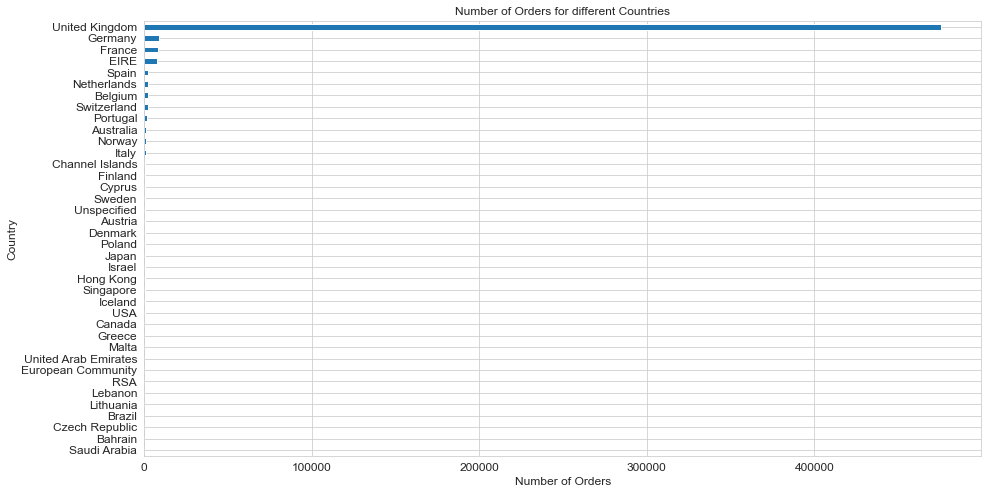

In [36]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

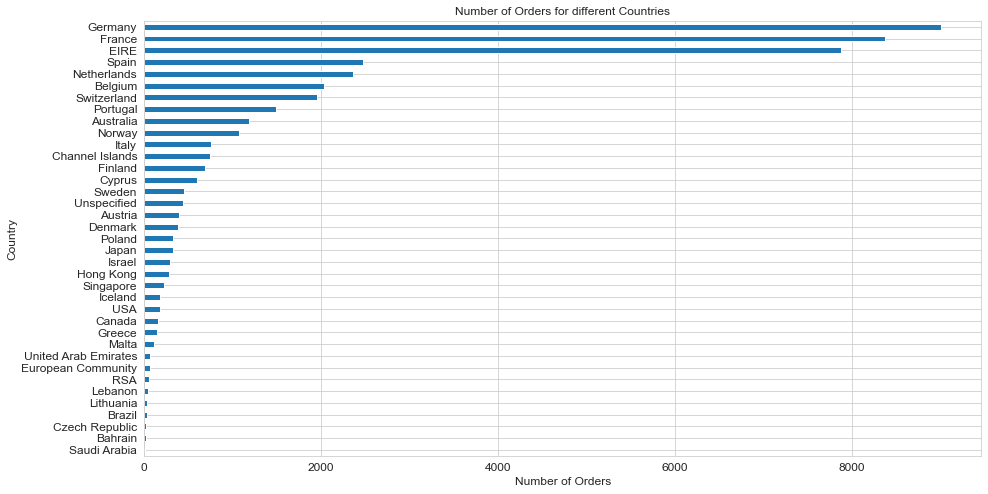

In [37]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']
# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

# 14. Orders trend across months 

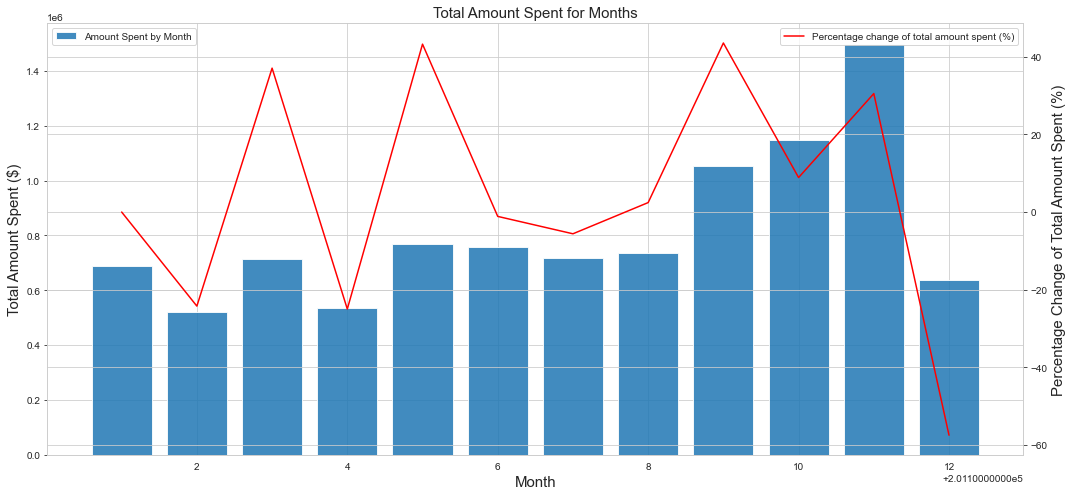

In [38]:
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df_new.groupby(by=['year_month'])['Sales'].sum().index.tolist()[1:],
        df_new.groupby(by=['year_month'])['Sales'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(df_new.groupby(by=['year_month'])['Sales'].sum().index.tolist()[1:], 
         df_new.groupby(by=['year_month'])['Sales'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

# 15. How much money spent by each country? 

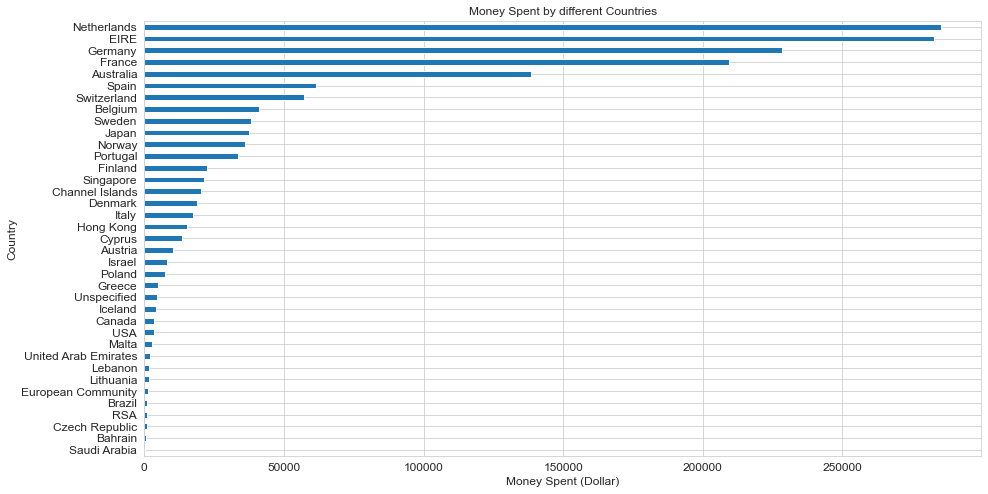

In [39]:
group_country_amount_spent = df_new.groupby('Country')['Sales'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

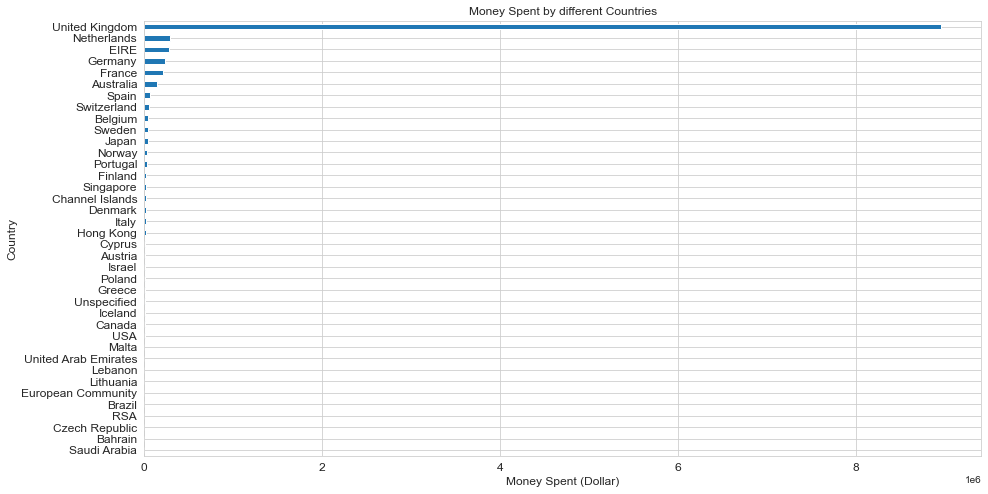

In [40]:
group_country_amount_spent = df_new.groupby('Country')['Sales'].sum().sort_values()
#del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [41]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

# 1. Perform Basic EDA

a. Boxplot – All Numeric Variables

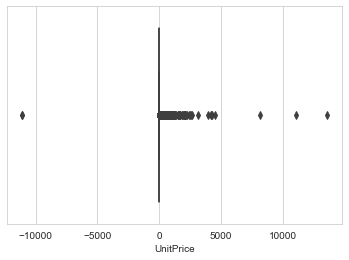

In [42]:
sns.boxplot(df_new["UnitPrice"]);

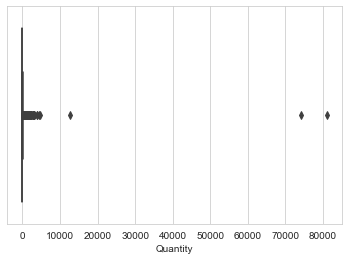

In [43]:
sns.boxplot(df_new["Quantity"]);

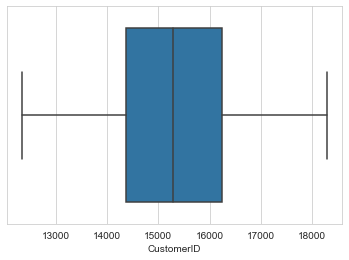

In [44]:
sns.boxplot(df_new["CustomerID"]);

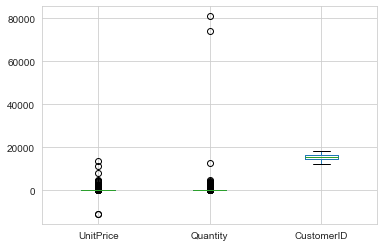

In [45]:
df_new.boxplot(column=["UnitPrice","Quantity","CustomerID"]);

b. Histogram – All Numeric Variables 

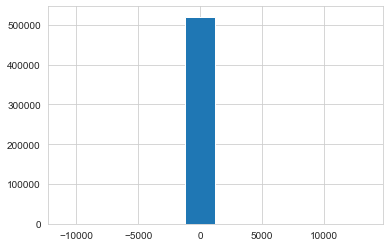

In [46]:
plt.hist(df_new["UnitPrice"])
plt.show;

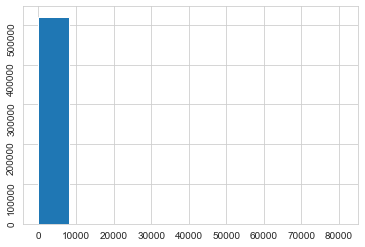

In [47]:
plt.hist(df_new["Quantity"])
plt.yticks(rotation=90)
plt.show;

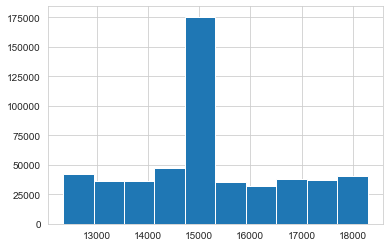

In [48]:
plt.hist(df_new["CustomerID"])
plt.show;

c. Distribution Plot – All Numeric Variables

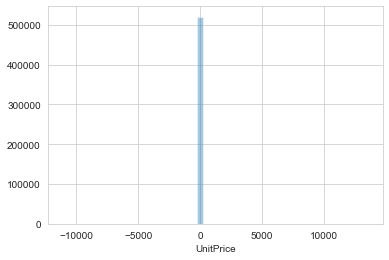

In [49]:
sns.distplot(df_new.UnitPrice, kde=False);

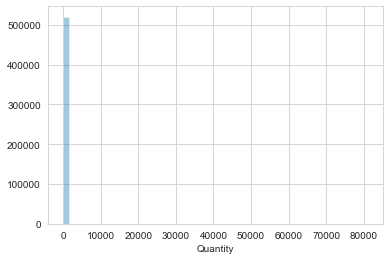

In [50]:
sns.distplot(df_new.Quantity, kde=False);

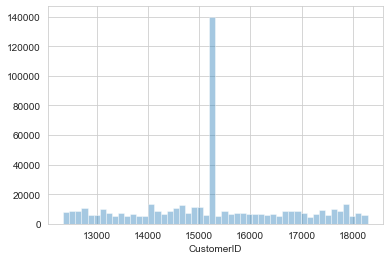

In [51]:
sns.distplot(df_new.CustomerID, kde=False);

d. Aggregation for all numerical Columns

In [52]:
df_new.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,year_month,Day,Hour,Sales
count,520615.000000,520615.000000,520615.000000,520615.000000,520615.000000,520615.000000,520615.000000,520615.000000,520615.000000
mean,10.751738,3.889874,15283.167982,2010.921856,7.544740,201099.730329,3.421655,13.072605,20.355103
std,158.114076,42.234460,1479.497467,0.268398,3.508066,25.749824,1.840967,2.446537,273.662492
min,1.000000,-11062.060000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,-11062.060000
25%,1.000000,1.250000,14367.000000,2011.000000,5.000000,201103.000000,2.000000,11.000000,4.130000
50%,4.000000,2.080000,15287.690570,2011.000000,8.000000,201107.000000,3.000000,13.000000,9.950000
75%,12.000000,4.130000,16241.000000,2011.000000,11.000000,201110.000000,5.000000,15.000000,17.700000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.600000


e. Unique Values across all columns

In [53]:
df.nunique(axis=0)

InvoiceNo      24440
StockCode       3958
Description     4223
Quantity         670
InvoiceDate    22305
UnitPrice       1629
CustomerID      4373
Country           38
dtype: int64

f. Duplicate values across all columns

In [54]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


g. Correlation – Heatmap - All Numeric Variables

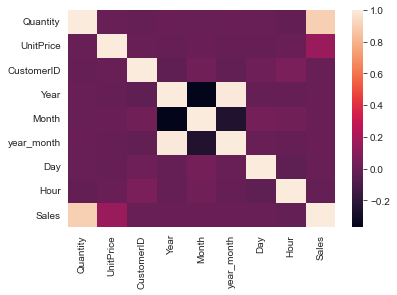

In [55]:
sns.heatmap(df_new.corr())
plt.show()

Regression Plot - All Numeric Variables

Taking top 20K rows in dataframe(df_20K) for visualizing Regression Plot for Numeric Variables

In [65]:
df_new.shape

(520615, 14)

In [66]:
df_20K = df_new.head(20000)

In [67]:
df_20K.shape

(20000, 14)

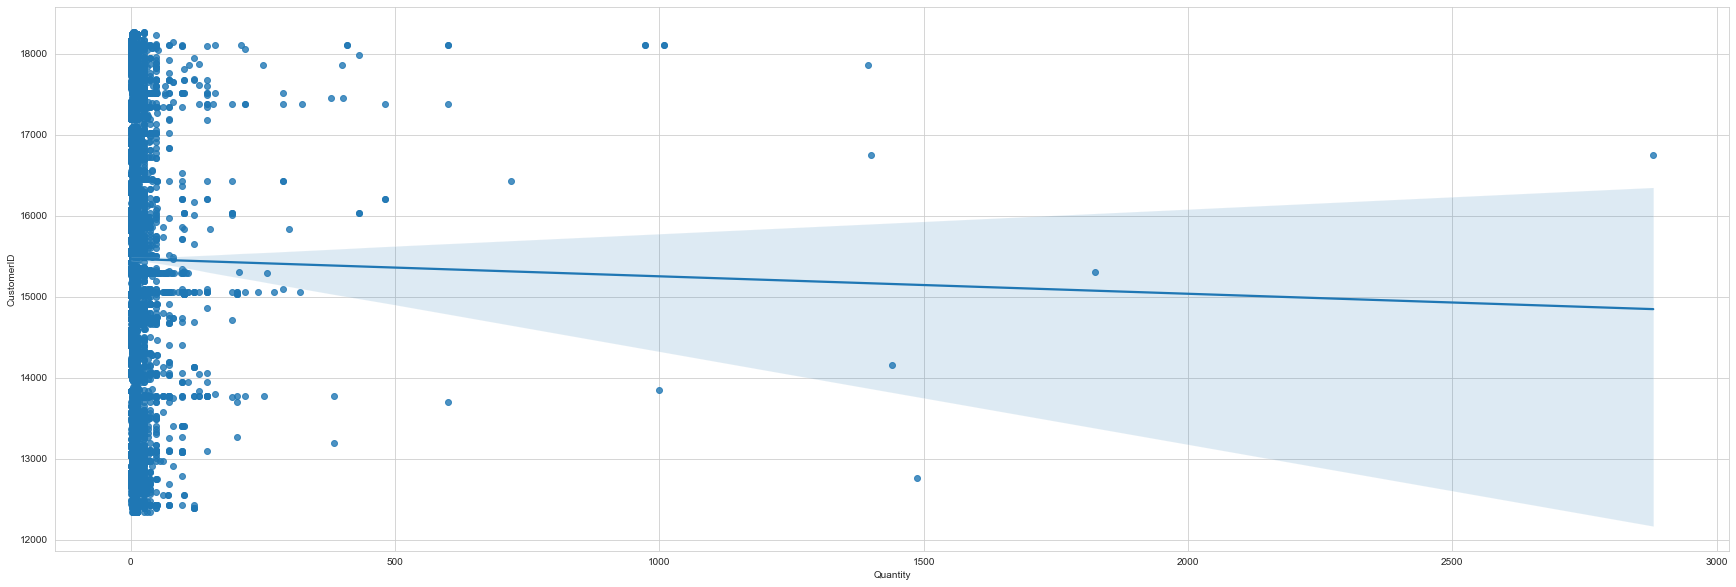

Wall time: 2.07 s


In [85]:
%%time
plt.subplots(figsize=(30,10))
sns.regplot(x="Quantity", y="CustomerID", data=df_20K);
plt.show()

Wall time: 1.35 s


<AxesSubplot:xlabel='CustomerID', ylabel='UnitPrice'>

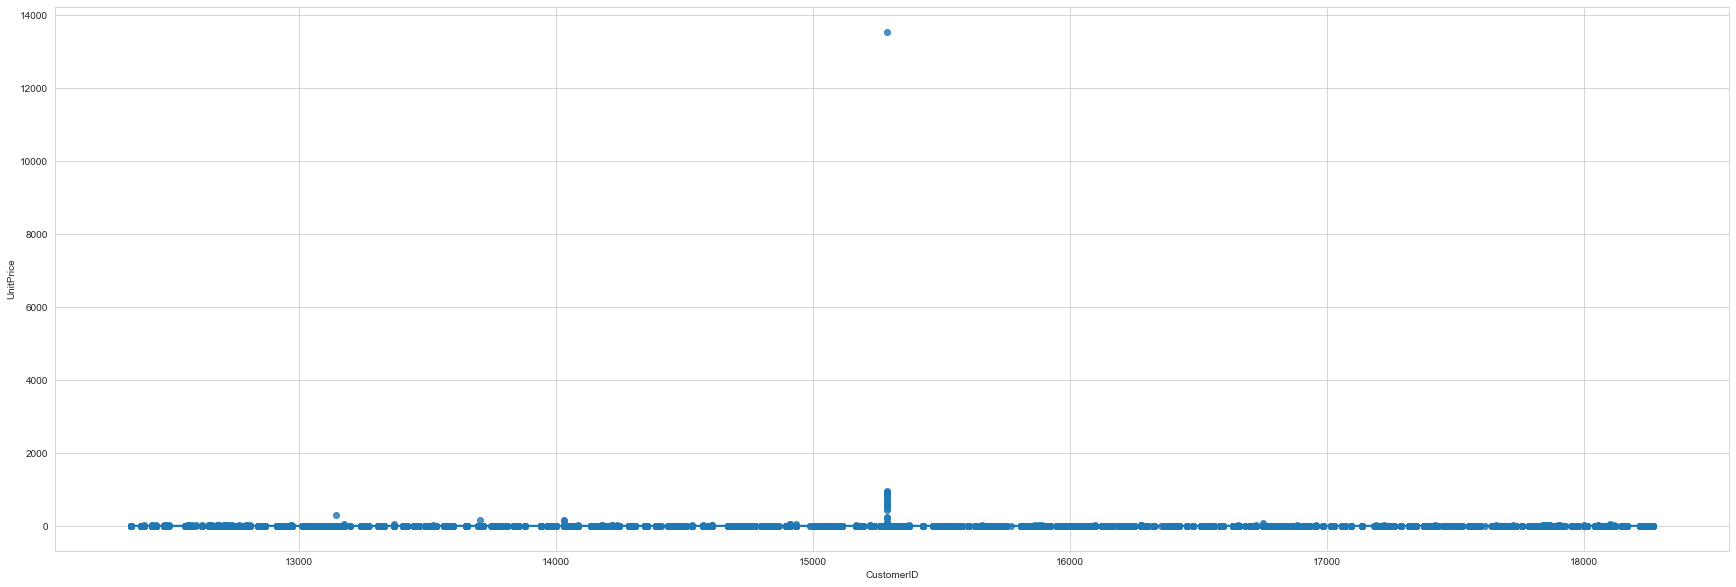

In [86]:
%%time
plt.subplots(figsize=(30,10))
sns.regplot(x="CustomerID", y="UnitPrice", data=df_20K);

Wall time: 1.08 s


<AxesSubplot:xlabel='Sales', ylabel='CustomerID'>

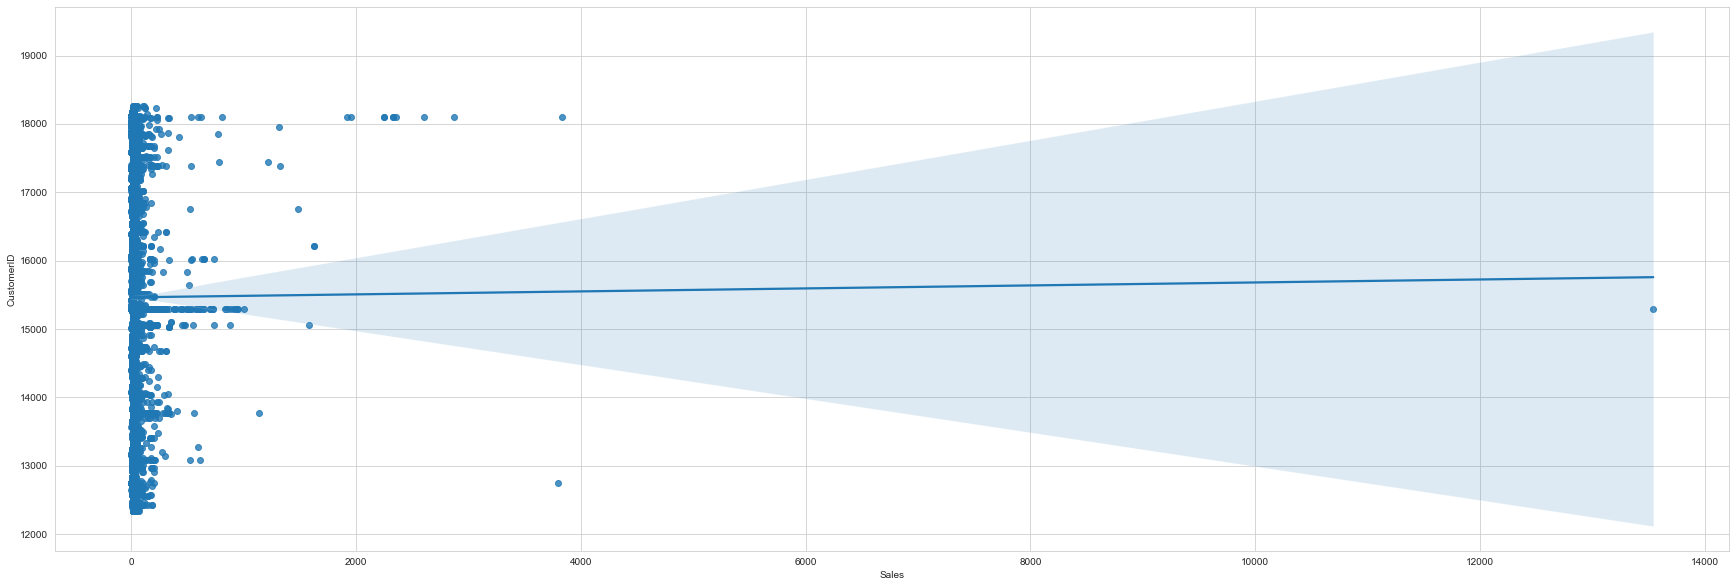

In [87]:
%%time
plt.subplots(figsize=(30,10))
sns.regplot(x="Sales", y="CustomerID", data=df_20K);

Wall time: 1.5 s


<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

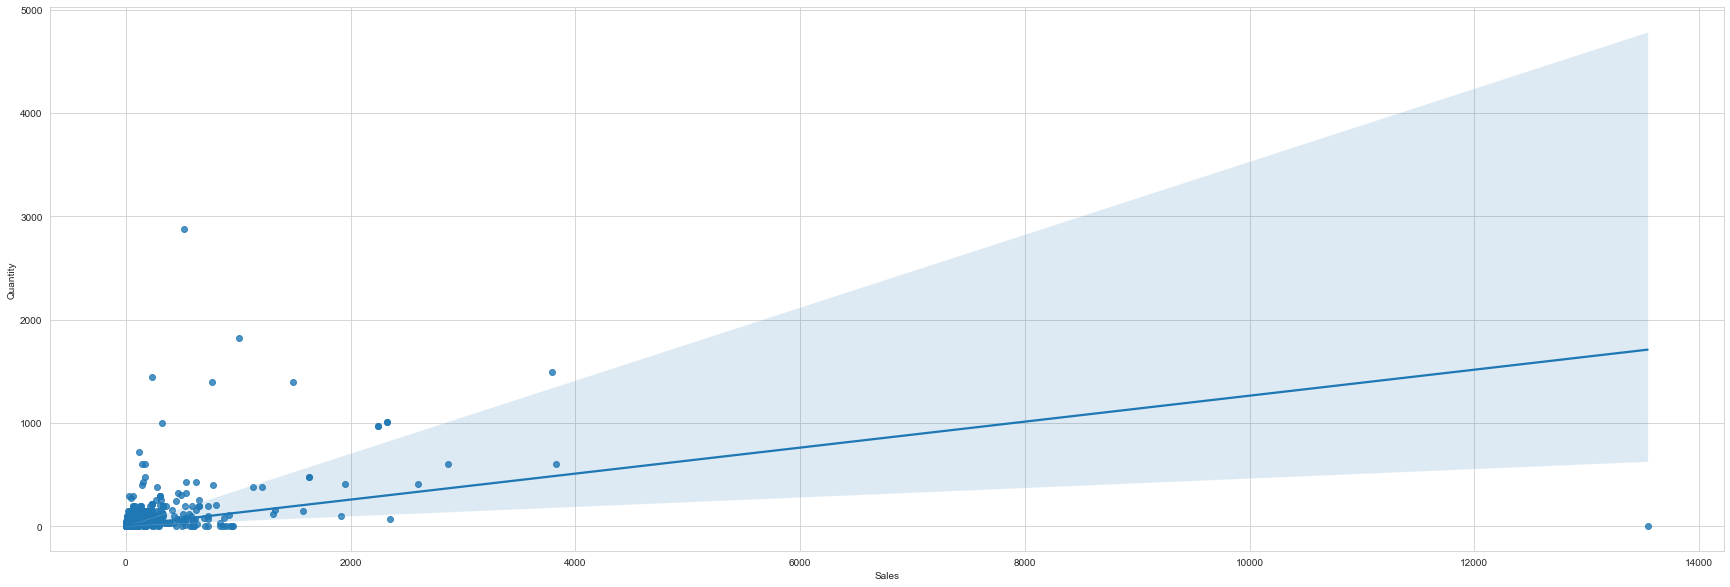

In [88]:
%%time
plt.subplots(figsize=(30,10))
sns.regplot(x="Sales", y="Quantity", data=df_20K);

Wall time: 1.31 s


<AxesSubplot:xlabel='Sales', ylabel='UnitPrice'>

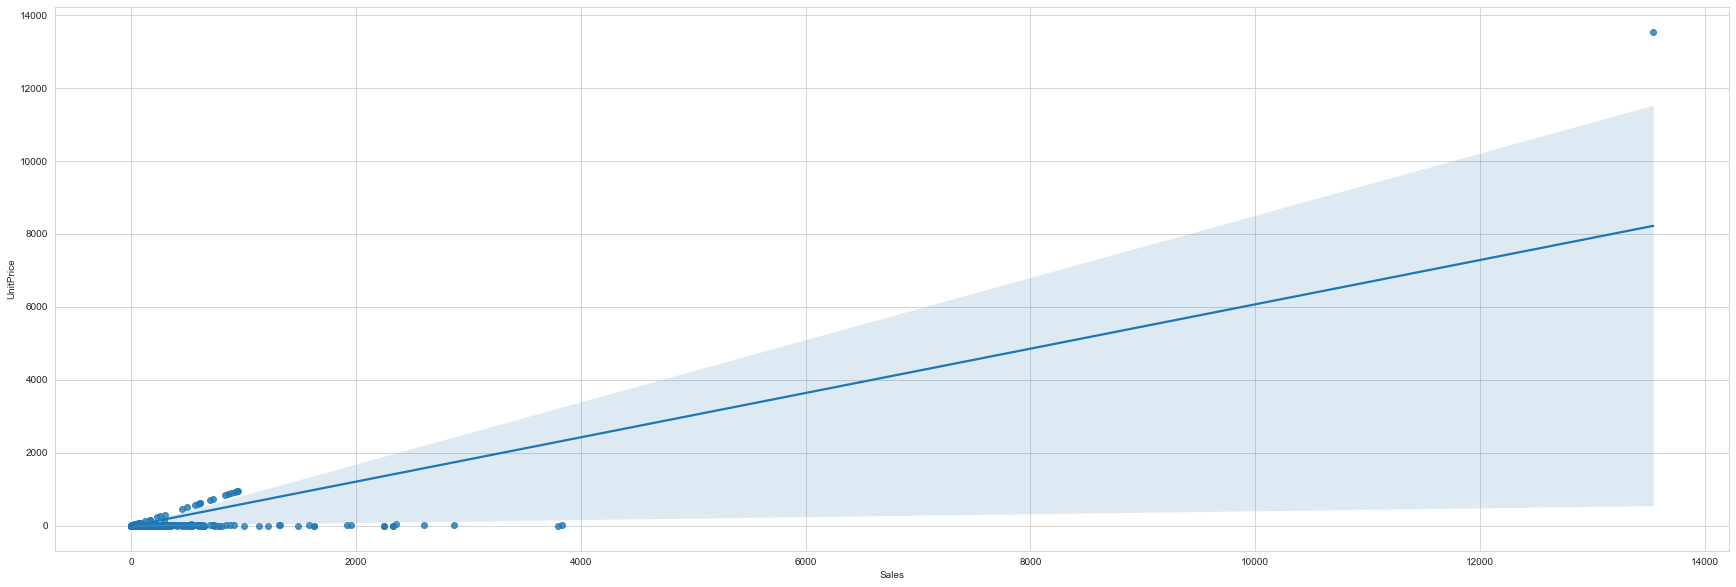

In [89]:
%%time
plt.subplots(figsize=(30,10))
sns.regplot(x="Sales", y="UnitPrice", data=df_20K);

i. Bar Plot – Every Categorical Variable vs every Numerical Variable

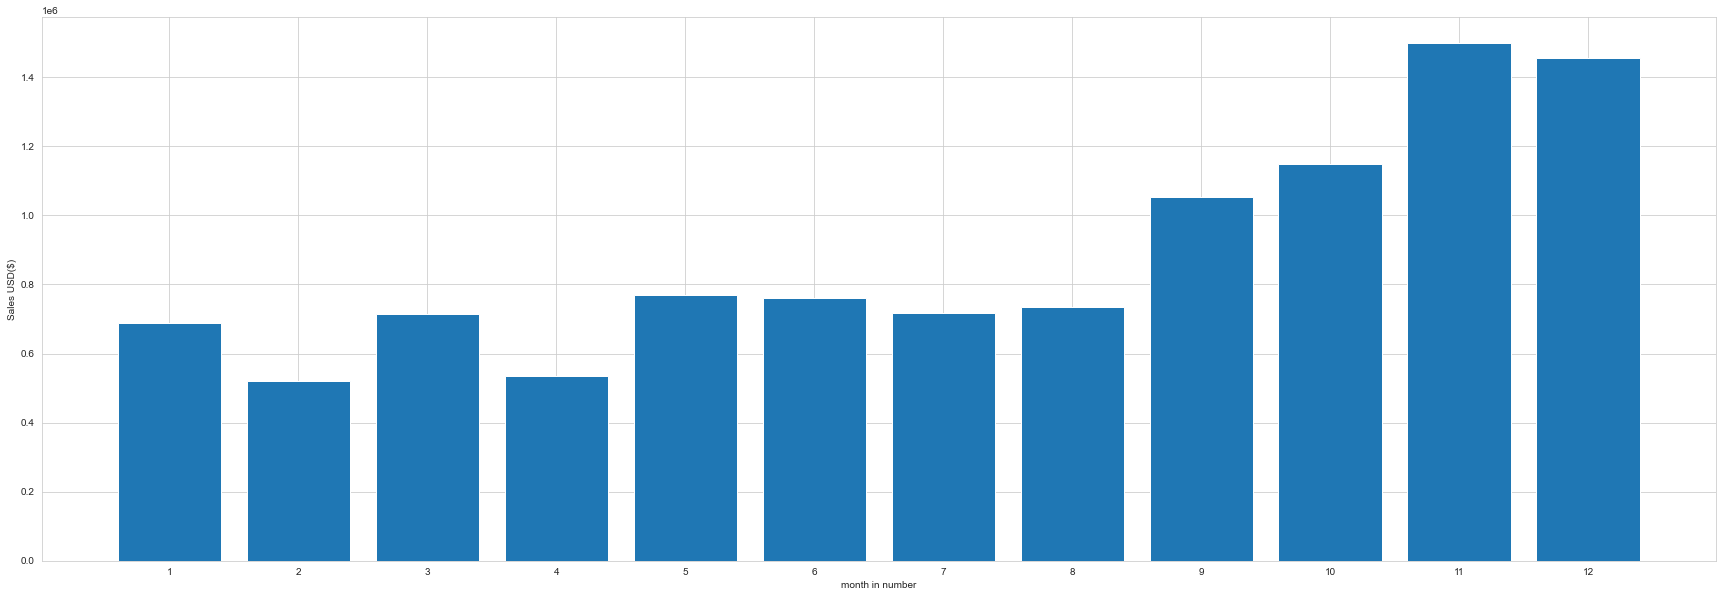

In [111]:
result=df_new.groupby('Month').sum()
month=range(1,13)
plt.subplots(figsize=(30,10))
plt.bar(month,result['Sales'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Sales USD($)')
plt.show()

Wall time: 8.67 s


<AxesSubplot:xlabel='Year', ylabel='Sales'>

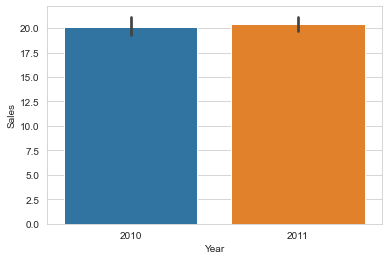

In [95]:
%%time
sns.barplot(x="Year", y="Sales", data=df_new)

Wall time: 4.07 s


<AxesSubplot:xlabel='Month', ylabel='Sales'>

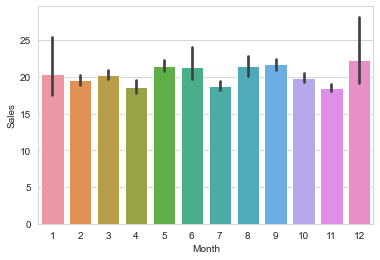

In [96]:
%%time
sns.barplot(x="Month", y="Sales", data=df_new)

Wall time: 4.11 s


<AxesSubplot:xlabel='Day', ylabel='Sales'>

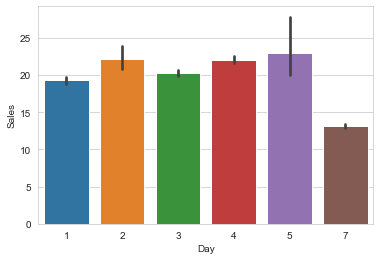

In [97]:
%%time
sns.barplot(x="Day", y="Sales", data=df_new)

Wall time: 4.67 s


<AxesSubplot:xlabel='Hour', ylabel='Sales'>

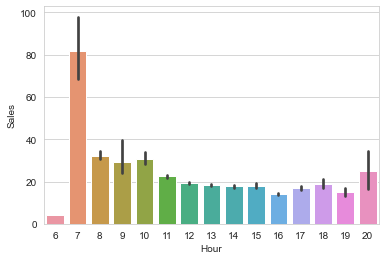

In [98]:
%%time
sns.barplot(x="Hour", y="Sales", data=df_new)

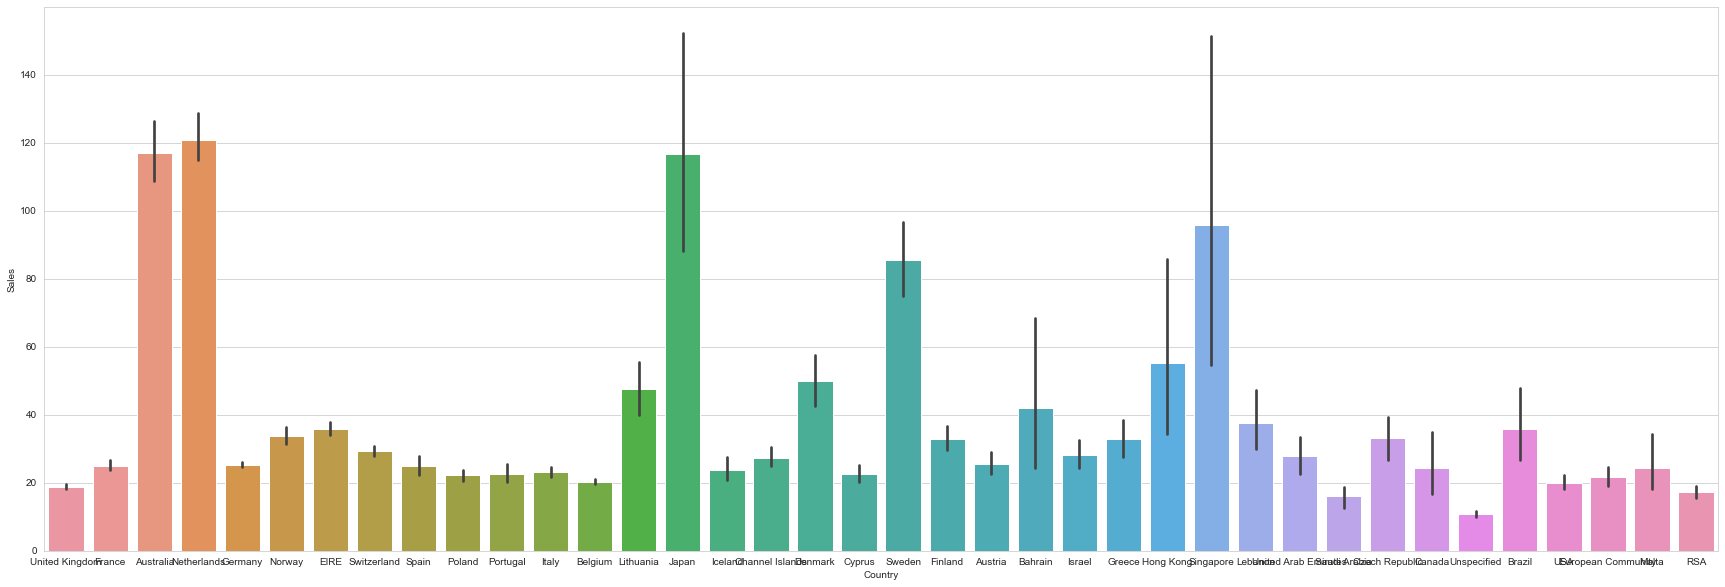

Wall time: 9.1 s


In [100]:
%%time
plt.subplots(figsize=(30,10))
sns.barplot(x="Country", y="Sales", data=df_new)
plt.show()

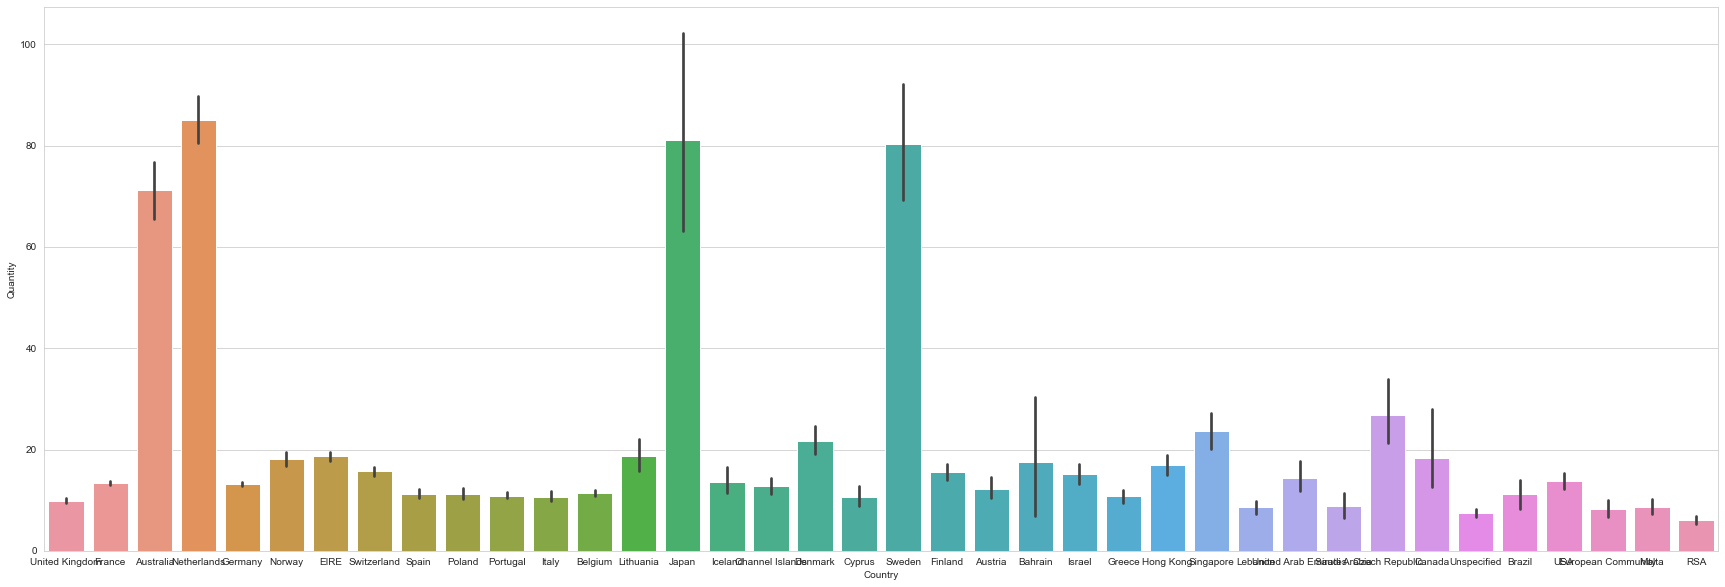

Wall time: 9.3 s


In [101]:
%%time
plt.subplots(figsize=(30,10))
sns.barplot(x="Country", y="Quantity", data=df_new)
plt.show()

j. Pair plot - All Numeric Variables 

In [84]:
# %%time
# sns.pairplot(df_20K,vars=["Quantity","UnitPrice","Sales"], kind='reg')
# plt.show()

k. Line chart to show the trend of data - All Numeric/Date Variables

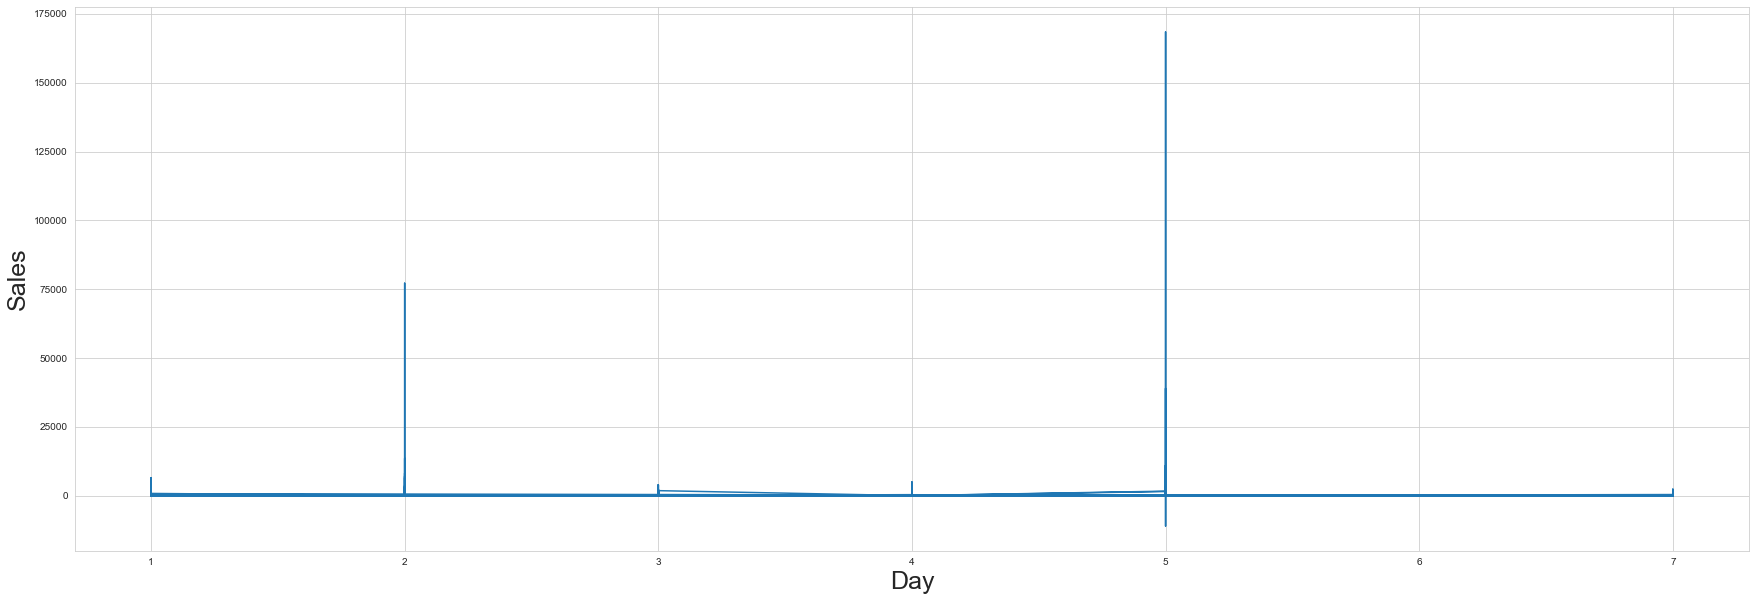

In [108]:
plt.subplots(figsize=(30,10))
plt.plot(df_new['Day'],df_new['Sales'])
plt.xlabel('Day', fontsize=25)
plt.ylabel('Sales', fontsize=25)
plt.show()

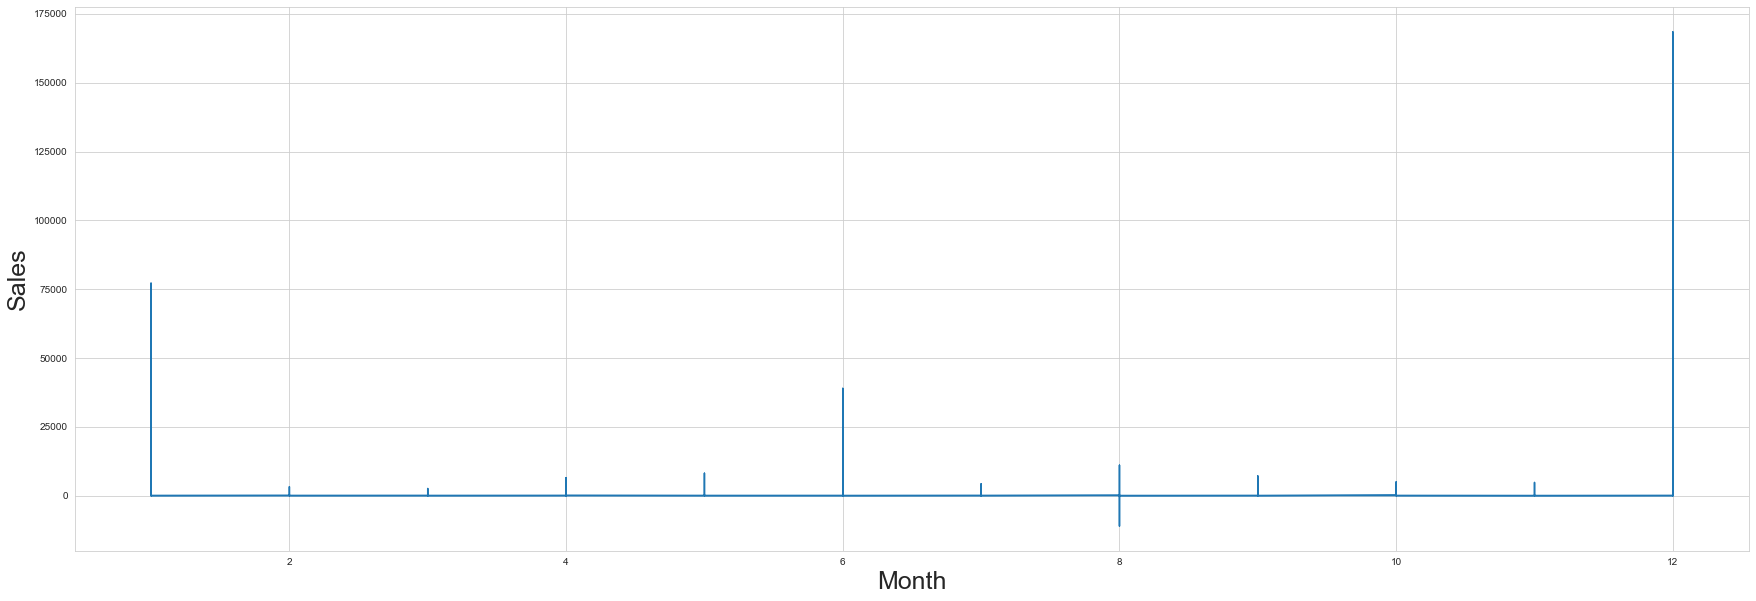

In [109]:
plt.subplots(figsize=(30,10))
plt.plot(df_new['Month'],df_new['Sales'])
plt.xlabel('Month',  fontsize=25)
plt.ylabel('Sales',  fontsize=25)
plt.show()

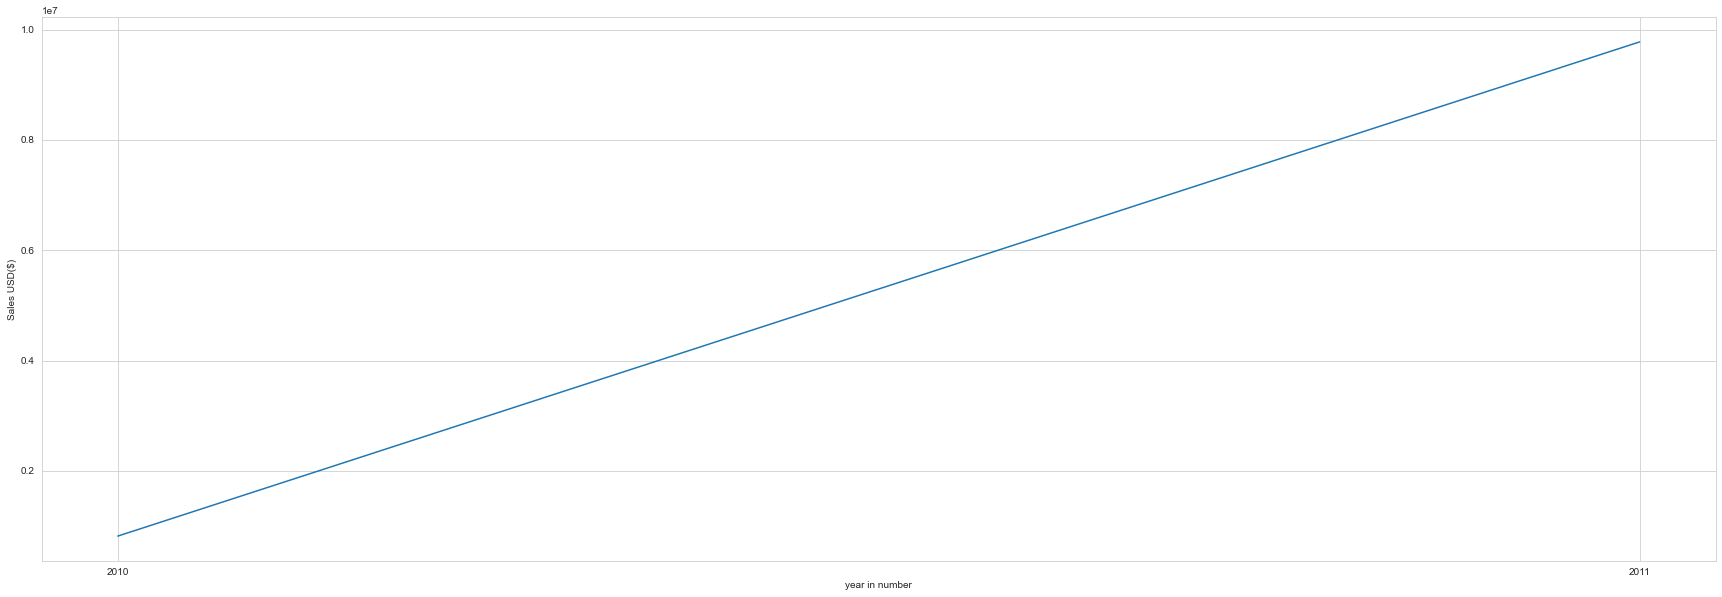

In [118]:
result=df_new.groupby('Year').sum()
year=range(2010,2012)
plt.subplots(figsize=(30,10))
plt.plot(year,result['Sales'])
plt.xticks(year)
plt.xlabel('year in number')
plt.ylabel('Sales USD($)')
plt.show()

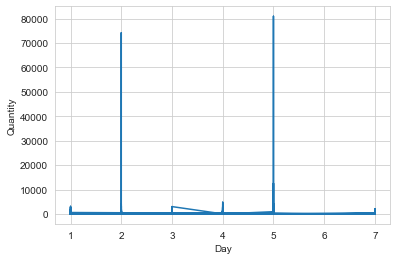

In [117]:
plt.plot(df_new['Day'],df_new['Quantity'])
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.show()

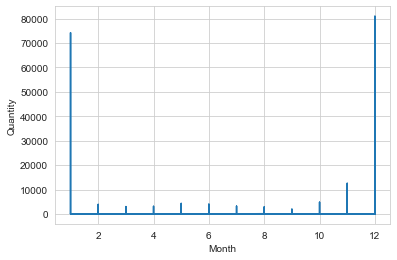

In [119]:
plt.plot(df_new['Month'],df_new['Quantity'])
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

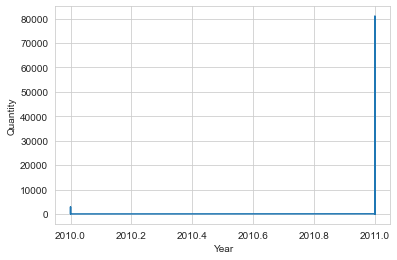

In [120]:
plt.plot(df_new['Year'],df_new['Quantity'])
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

l. Plot the skewness - All Numeric Variables 

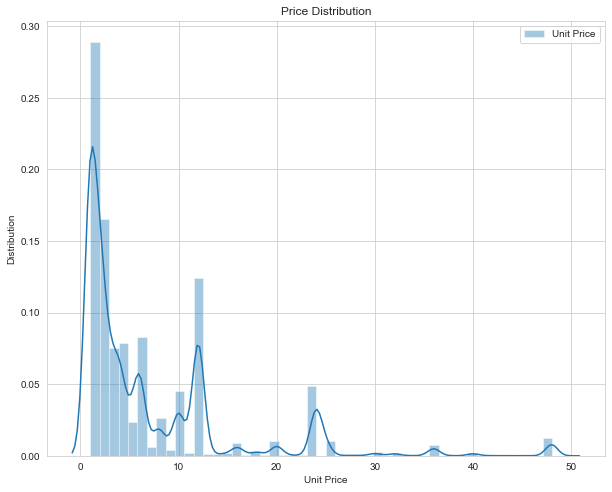

In [121]:
plt.subplots(figsize=(10,8))
sns.distplot(df_new.Quantity[df_new.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()